# Importing Libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Dataset

In [2]:
# Reading the dataset and tranforming into dataframe, using pandas
df = pd.read_csv("General_Building_Permits_20241013.csv")

C:\Users\diona\AppData\Local\Temp\ipykernel_34168\1395603094.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("General_Building_Permits_20241013.csv")


# Descriptive Data

### Visualizing Dataset

In [3]:
# Checking first 5 rows in our dataframe
df.head()

Row ID PERMIT_DATE  PERMIT_NUMBER REPORT_PERMIT_DATE  YEAR  \
0   0-92364164  2009-12-01            NaN         2009-12-01  2009   
1   4-61061551  2010-08-18            NaN         2010-08-18  2010   
2  0-118565935  2011-12-21            NaN         2011-12-21  2011   
3    4-1008977  2012-02-22            NaN         2012-02-22  2012   
4  6-110854100  2012-04-16            NaN         2012-04-16  2012   

   MONTH_NUMBER                  JOB_CATEGORY  \
0            12  Other Miscellaneous Building   
1             8              Commercial Final   
2            12              Commercial Final   
3             2              Commercial Final   
4             4              Commercial Final   

                                     JOB_DESCRIPTION           BUILDING_TYPE  \
0              To install a Hot Tub in the back yard            Duplex (210)   
1  To construct an Apartment Building with underg...        Apartments (310)   
2  Interior Alterations to an existing retail spa...  Retail and Shops (510)   
3  To construct interior alterations (Royal Alexa...         Hospitals (640)   
4  To construct Interior Alterations to an Office...  Office Buildings (520)   

                   WORK_TYPE  ...                                  ADDRESS  \
0               (14) Hot Tub  ...                   2, 4020 - 21 STREET NW   
1                   (01) New  ...                      2204 - 44 AVENUE NW   
2  (03) Interior Alterations  ...  142, 1 - BONNIE DOON SHOPPING CENTRE NW   
3  (03) Interior Alterations  ...                      10240 - KINGSWAY NW   
4  (03) Interior Alterations  ...                   1103 - PARSONS ROAD SW   

                  LEGAL_DESCRIPTION    ZONING NEIGHBOURHOOD_NUMBER  \
0               Plan 0125656 Unit 2       NaN                  NaN   
1  Condo Common Area (Plan 1025849)   RA7, RM                 6390   
2      Plan 2224KS Blk 3 Lots A,B,C  DC2, DC2                 6040   
3         Plan 1619KS Blk 2 Lot 313        US                 1030   
4          Plan 1123569 Blk 1 Lot 9       EIB                 6214   

          NEIGHBOURHOOD COUNT LATITUDE LONGITUDE  LOCATION  Geometry Point  
0                   NaN     1      NaN       NaN       NaN             NaN  
1              LARKSPUR     1      NaN       NaN       NaN             NaN  
2           BONNIE DOON     1      NaN       NaN       NaN             NaN  
3     CENTRAL MCDOUGALL     1      NaN       NaN       NaN             NaN  
4  ELLERSLIE INDUSTRIAL     1      NaN       NaN       NaN             NaN  

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215533 entries, 0 to 215532
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Row ID                215533 non-null  object 
 1   PERMIT_DATE           215533 non-null  object 
 2   PERMIT_NUMBER         0 non-null       float64
 3   REPORT_PERMIT_DATE    215533 non-null  object 
 4   YEAR                  215533 non-null  int64  
 5   MONTH_NUMBER          215533 non-null  int64  
 6   JOB_CATEGORY          215533 non-null  object 
 7   JOB_DESCRIPTION       215491 non-null  object 
 8   BUILDING_TYPE         214248 non-null  object 
 9   WORK_TYPE             169297 non-null  object 
 10  CONSTRUCTION_VALUE    189082 non-null  float64
 11  FLOOR_AREA            131778 non-null  float64
 12  UNITS_ADDED           169471 non-null  float64
 13  ADDRESS               215474 non-null  object 
 14  LEGAL_DESCRIPTION     215230 non-null  object 
 15  

In [5]:
df.describe()

PERMIT_NUMBER           YEAR   MONTH_NUMBER  CONSTRUCTION_VALUE  \
count            0.0  215533.000000  215533.000000        1.890820e+05   
mean             NaN    2016.908872       6.578143        2.911820e+05   
std              NaN       4.438599       3.214293        2.324971e+06   
min              NaN    2009.000000       1.000000       -1.000000e+00   
25%              NaN    2013.000000       4.000000        6.072000e+03   
50%              NaN    2017.000000       7.000000        5.000000e+04   
75%              NaN    2021.000000       9.000000        3.001738e+05   
max              NaN    2024.000000      12.000000        4.802567e+08   

         FLOOR_AREA    UNITS_ADDED     COUNT       LATITUDE      LONGITUDE  
count  1.317780e+05  169471.000000  215533.0  209945.000000  209945.000000  
mean   4.399127e+03       0.882985       1.0      53.505349    -113.523158  
std    3.037756e+05       6.343019       0.0       0.073215       0.092405  
min   -2.185000e+03    -140.000000       1.0      53.341531    -113.712982  
25%    8.760000e+02       0.000000       1.0      53.435581    -113.588735  
50%    1.747000e+03       0.000000       1.0      53.508940    -113.516935  
75%    2.480000e+03       1.000000       1.0      53.557981    -113.450982  
max    1.076390e+08     483.000000       1.0      53.715131    -113.287313

In [6]:
'''
 Column Descriptions

- `ROW_ID`: System-generated ID used to identify a particular row of data.
  - **Type**: Text
- `PERMIT_DATE`: The date when the building permit was issued.
  - **Type**: Floating Timestamp
- `PERMIT_NUMBER`: Unique City-issued permit number (blanked due to FOIP reasons).
  - **Type**: Text
- `REPORT_PERMIT_DATE`: Report label for the permit date.
  - **Type**: Floating Timestamp
- `YEAR`: Year when the permit was issued.
  - **Type**: Number
- `MONTH_NUMBER`: Month number when the permit was issued.
  - **Type**: Number
- `JOB_CATEGORY`: Type of building permit issued.
  - **Type**: Text
- `JOB_DESCRIPTION`: Description of the building permit issued.
  - **Type**: Text
- `BUILDING_TYPE`: Type of the building structure for which the permit was issued.
  - **Type**: Text
- `WORK_TYPE`: Type of work to be done under the permit.
  - **Type**: Text
- `CONSTRUCTION_VALUE`: Estimated value of the construction work.
  - **Type**: Number
- `FLOOR_AREA`: Square footage of the floor area related to the permit.
  - **Type**: Number
- `UNITS_ADDED`: Change in dwelling units (added as part of the project).
  - **Type**: Number
- `ADDRESS`: Address for which the building permit was issued.
  - **Type**: Text
- `LEGAL_DESCRIPTION`: Legal description of the address where the permit was issued.
  - **Type**: Text

  *Description provided by Edmonton's Data Dept. 
  
'''

"\n Column Descriptions\n\n- `ROW_ID`: System-generated ID used to identify a particular row of data.\n  - **Type**: Text\n- `PERMIT_DATE`: The date when the building permit was issued.\n  - **Type**: Floating Timestamp\n- `PERMIT_NUMBER`: Unique City-issued permit number (blanked due to FOIP reasons).\n  - **Type**: Text\n- `REPORT_PERMIT_DATE`: Report label for the permit date.\n  - **Type**: Floating Timestamp\n- `YEAR`: Year when the permit was issued.\n  - **Type**: Number\n- `MONTH_NUMBER`: Month number when the permit was issued.\n  - **Type**: Number\n- `JOB_CATEGORY`: Type of building permit issued.\n  - **Type**: Text\n- `JOB_DESCRIPTION`: Description of the building permit issued.\n  - **Type**: Text\n- `BUILDING_TYPE`: Type of the building structure for which the permit was issued.\n  - **Type**: Text\n- `WORK_TYPE`: Type of work to be done under the permit.\n  - **Type**: Text\n- `CONSTRUCTION_VALUE`: Estimated value of the construction work.\n  - **Type**: Number\n- `FLOO

# Data Cleaning and Transformation

In [7]:
df['PERMIT_DATE'] = pd.to_datetime(df['PERMIT_DATE'], errors='coerce')
df['REPORT_PERMIT_DATE'] = pd.to_datetime(df['REPORT_PERMIT_DATE'], errors='coerce')

In [8]:
columns_to_convert = ['YEAR', 'MONTH_NUMBER', 'CONSTRUCTION_VALUE', 'FLOOR_AREA', 'UNITS_ADDED']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [9]:
df.dtypes

Row ID                          object
PERMIT_DATE             datetime64[ns]
PERMIT_NUMBER                  float64
REPORT_PERMIT_DATE      datetime64[ns]
YEAR                             int64
MONTH_NUMBER                     int64
JOB_CATEGORY                    object
JOB_DESCRIPTION                 object
BUILDING_TYPE                   object
WORK_TYPE                       object
CONSTRUCTION_VALUE             float64
FLOOR_AREA                     float64
UNITS_ADDED                    float64
ADDRESS                         object
LEGAL_DESCRIPTION               object
ZONING                          object
NEIGHBOURHOOD_NUMBER            object
NEIGHBOURHOOD                   object
COUNT                            int64
LATITUDE                       float64
LONGITUDE                      float64
LOCATION                        object
Geometry Point                  object
dtype: object

In [10]:
#Filter by JOB_CATEGORY first to focus on Houses and Rowhouses
housing_df = df[df['JOB_CATEGORY'] == 'Single, Semi-detached & Rowhousing']

#Also filter by WORK_TYPE focusing only in NEW UNITS
new_houses_df = housing_df[housing_df['WORK_TYPE'].isin(['(01) Building - New', '(01) New House'])]



In [11]:
new_houses_df

Row ID PERMIT_DATE  PERMIT_NUMBER REPORT_PERMIT_DATE  YEAR  \
40     66-64301271  2010-01-12            NaN         2010-01-12  2010   
41     37-67940861  2011-04-21            NaN         2011-04-21  2011   
42      7-91200265  2012-04-12            NaN         2012-04-12  2012   
43      4-92886477  2012-05-29            NaN         2012-05-29  2012   
44     2-135966676  2013-04-03            NaN         2013-04-03  2013   
...            ...         ...            ...                ...   ...   
81046  2-530012890  2024-09-26            NaN         2024-09-26  2024   
81047  2-502767305  2024-05-30            NaN         2024-05-30  2024   
81055  2-513440546  2024-08-15            NaN         2024-08-15  2024   
81056  2-527444350  2024-09-09            NaN         2024-09-09  2024   
81062  2-516890642  2024-07-17            NaN         2024-07-17  2024   

       MONTH_NUMBER                        JOB_CATEGORY  \
40                1  Single, Semi-detached & Rowhousing   
41                4  Single, Semi-detached & Rowhousing   
42                4  Single, Semi-detached & Rowhousing   
43                5  Single, Semi-detached & Rowhousing   
44                4  Single, Semi-detached & Rowhousing   
...             ...                                 ...   
81046             9  Single, Semi-detached & Rowhousing   
81047             5  Single, Semi-detached & Rowhousing   
81055             8  Single, Semi-detached & Rowhousing   
81056             9  Single, Semi-detached & Rowhousing   
81062             7  Single, Semi-detached & Rowhousing   

                                         JOB_DESCRIPTION  \
40     To construct a 4-unit Row Housing Building #56...   
41     To construct a semi-detached house (units 22 &...   
42     To construct 4 units Row Housing project (17,1...   
43     To construct a three dwelling row house building.   
44     To construct a Semi-Detached House with uncove...   
...                                                  ...   
81046  To construct a Residential Use building in the...   
81047  To construct a Residential Use in a form of a ...   
81055  To construct a 3-Dwelling Row House with an un...   
81056  To construct a Residential Use building in the...   
81062  To construct a Residential Use building in the...   

                     BUILDING_TYPE            WORK_TYPE  ...  \
40                 Row House (330)  (01) Building - New  ...   
41       Semi-Detached House (210)  (01) Building - New  ...   
42                 Row House (330)  (01) Building - New  ...   
43                 Row House (330)  (01) Building - New  ...   
44       Semi-Detached House (210)  (01) Building - New  ...   
...                            ...                  ...  ...   
81046  Single Detached House (110)  (01) Building - New  ...   
81047  Single Detached House (110)  (01) Building - New  ...   
81055              Row House (330)  (01) Building - New  ...   
81056  Single Detached House (110)  (01) Building - New  ...   
81062    Semi-Detached House (210)  (01) Building - New  ...   

                            ADDRESS                 LEGAL_DESCRIPTION  \
40          59, 1804 - 70 STREET SW  Condo Common Area (Plan 0825422)   
41      22, 1720 - GARNETT POINT NW              Plan 1025421 Unit 25   
42         20, 8716 - 179 AVENUE NW  Condo Common Area (Plan 1220146)   
43             10543 - 87 AVENUE NW  Condo Common Area (Plan 1420982)   
44     120 - CY BECKER BOULEVARD NW         Plan 1323004 Blk 11 Lot 1   
...                             ...                               ...   
81046         7225 - KIVIAQ LINK SW         Plan 2421661 Blk 3 Lot 62   
81047     3033 - MILNER CRESCENT NW        Plan 2322199 Blk 16 Lot 16   
81055          22727 - 93 AVENUE NW        Plan 2320798 Blk 29 Lot 36   
81056         7223 - KIVIAQ LINK SW         Plan 2421661 Blk 3 Lot 63   
81062      4797 - CAWSEY TERRACE SW        Plan 2320496 Blk 34 Lot 54   

                            ZONING NEIGHBOURHOO

In [12]:
new_houses_df.info() # to check for non-null values

<class 'pandas.core.frame.DataFrame'>
Index: 36972 entries, 40 to 81062
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                36972 non-null  object        
 1   PERMIT_DATE           36972 non-null  datetime64[ns]
 2   PERMIT_NUMBER         0 non-null      float64       
 3   REPORT_PERMIT_DATE    36972 non-null  datetime64[ns]
 4   YEAR                  36972 non-null  int64         
 5   MONTH_NUMBER          36972 non-null  int64         
 6   JOB_CATEGORY          36972 non-null  object        
 7   JOB_DESCRIPTION       36972 non-null  object        
 8   BUILDING_TYPE         36972 non-null  object        
 9   WORK_TYPE             36972 non-null  object        
 10  CONSTRUCTION_VALUE    36972 non-null  float64       
 11  FLOOR_AREA            36971 non-null  float64       
 12  UNITS_ADDED           36972 non-null  float64       
 13  ADDRESS             

In [13]:
## Making sure Lat and Long have all data needed for the visualization part

new_houses_df = new_houses_df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Check if LATITUDE and LONGITUDE both have values in each row
consistent_coords = (new_houses_df['LATITUDE'].notnull() & new_houses_df['LONGITUDE'].notnull()).all()

# Output the result
if consistent_coords:
    print("All rows have both LATITUDE and LONGITUDE values.")
else:
    print("There are rows where either LATITUDE or LONGITUDE is missing.")

All rows have both LATITUDE and LONGITUDE values.


In [14]:
# Checking new dataframe
new_houses_df

Row ID PERMIT_DATE  PERMIT_NUMBER REPORT_PERMIT_DATE  YEAR  \
26187     1-82135674  2009-01-06            NaN         2009-01-06  2009   
27700    2-265884164  2017-12-08            NaN         2017-12-08  2017   
27932   12-230176551  2018-05-23            NaN         2018-05-23  2018   
28053     1-88943697  2012-01-18            NaN         2012-01-18  2012   
28154     1-63397302  2009-04-01            NaN         2009-04-01  2009   
...              ...         ...            ...                ...   ...   
81036    2-502309191  2024-09-11            NaN         2024-09-11  2024   
81044  190-187088640  2024-07-11            NaN         2024-07-11  2024   
81047    2-502767305  2024-05-30            NaN         2024-05-30  2024   
81055    2-513440546  2024-08-15            NaN         2024-08-15  2024   
81062    2-516890642  2024-07-17            NaN         2024-07-17  2024   

       MONTH_NUMBER                        JOB_CATEGORY  \
26187             1  Single, Semi-detached & Rowhousing   
27700            12  Single, Semi-detached & Rowhousing   
27932             5  Single, Semi-detached & Rowhousing   
28053             1  Single, Semi-detached & Rowhousing   
28154             4  Single, Semi-detached & Rowhousing   
...             ...                                 ...   
81036             9  Single, Semi-detached & Rowhousing   
81044             7  Single, Semi-detached & Rowhousing   
81047             5  Single, Semi-detached & Rowhousing   
81055             8  Single, Semi-detached & Rowhousing   
81062             7  Single, Semi-detached & Rowhousing   

                                         JOB_DESCRIPTION  \
26187  To construct a Semi-Detached House with attach...   
27700  To construct a 4 dwelling Row House with verandas   
27932       To construct a 3 Dwelling Row House building   
28053                       To construct a Duplex House.   
28154                 To construct a Semi-Detached House   
...                                                  ...   
81036  To construct a Residential Use building in the...   
81044  To construct a 4 Unit Row House with front att...   
81047  To construct a Residential Use in a form of a ...   
81055  To construct a 3-Dwelling Row House with an un...   
81062  To construct a Residential Use building in the...   

                     BUILDING_TYPE            WORK_TYPE  ...  \
26187    Semi-Detached House (210)  (01) Building - New  ...   
27700              Row House (330)  (01) Building - New  ...   
27932              Row House (330)  (01) Building - New  ...   
28053                 Duplex (210)  (01) Building - New  ...   
28154    Semi-Detached House (210)  (01) Building - New  ...   
...                            ...                  ...  ...   
81036  Single Detached House (110)  (01) Building - New  ...   
81044              Row House (330)  (01) Building - New  ...   
81047  Single Detached House (110)  (01) Building - New  ...   
81055              Row House (330)  (01) Building - New  ...   
81062    Semi-Detached House (210)  (01) Building - New  ...   

                         ADDRESS                 LEGAL_DESCRIPTION    ZONING  \
26187       2245 - AUSTIN WAY SW         Plan 0729436 Blk 4 Lot 84       RSF   
27700   1187 - CY BECKER ROAD NW         Plan 1524958 Blk 21 Lot 7       RSM   
27932       6329 - 109 STREET NW         Plan 2460HW Blk 19 Lot 16       RSM   
28053       8703 - 105 STREET NW  Condo Common Area (Plan 1422154)       RF4   
28154        7203 - 16 AVENUE SW       Plan 0624229 Blk 25 Lot 20B       RSF   
...                          ...                               ...       ...   
81036        723 - 165 AVENUE NE         Plan 2322084 Blk 3 Lot 23       RSF   
81044  63, 13139 - 205 STREET NW  Condo Common Area (Plan 1821005)        RM   
81047  3033 - MILNER CRESCENT NW        Plan 2322199 Blk 16 Lot 16      GLDF   
81055       22727 - 93 AVENUE NW        Plan 2320798 Blk 29 Lot 36       RSM   
81062   4797 - CAWSEY 

# Visualization Part

This project is focused on understanding the dynamics and behavior of NEW HOUSES and their UNITS (UNITS_ADDED - LABEL) in EDMONTON, AB.

Based on this, the following visualizations are built around our label, 
with the primary goal of creating an in-depth understanding of how Edmonton's real estate market is performing.

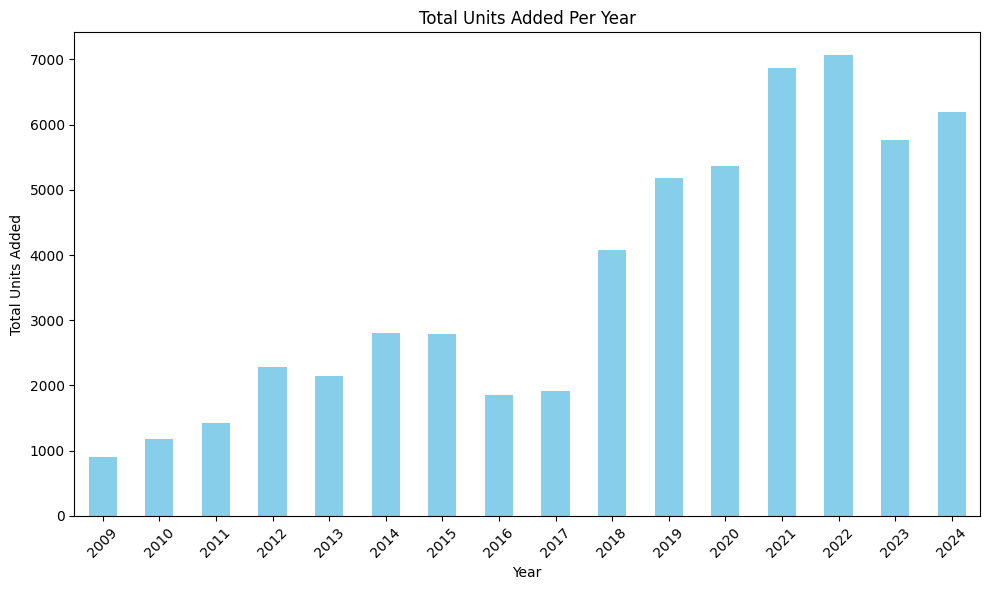

In [15]:
#(BAR CHART) - Total Units Added per Year

# Group by YEAR and sum the UNITS_ADDED for each year
units_per_year = new_houses_df.groupby('YEAR')['UNITS_ADDED'].sum()

plt.figure(figsize=(10, 6))
units_per_year.plot(kind='bar', color='skyblue')
plt.title('Total Units Added Per Year')
plt.xlabel('Year')
plt.ylabel('Total Units Added')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



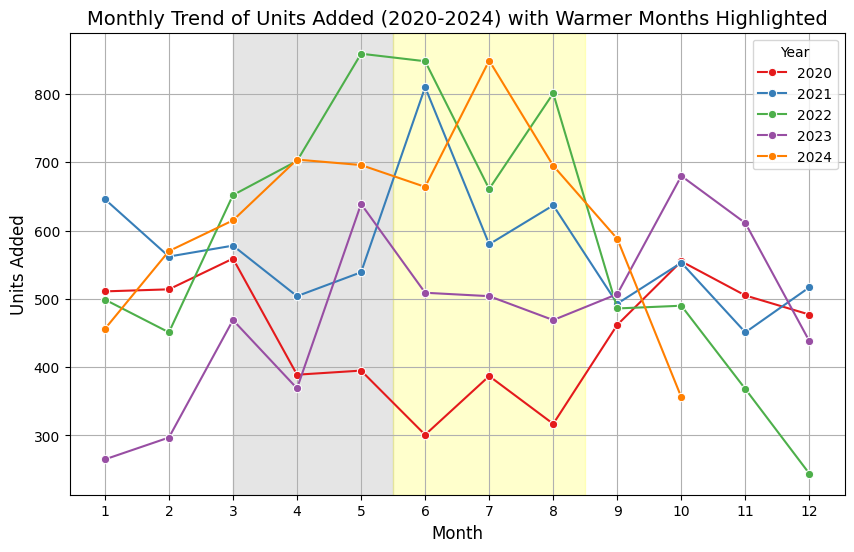

In [16]:
#(LINE CHART) - Total Units Added per Year

#Filter data for years 2020 to 2024 (Better chances to understand POS-COVID numebers)
filtered_df = new_houses_df[(new_houses_df['YEAR'] >= 2020) & (new_houses_df['YEAR'] <= 2024)]

#Group by 'YEAR' and 'MONTH_NUMBER' and sum 'UNITS_ADDED'
monthly_trend = filtered_df.groupby(['YEAR', 'MONTH_NUMBER'])['UNITS_ADDED'].sum().reset_index()


plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=monthly_trend, x='MONTH_NUMBER', y='UNITS_ADDED', hue='YEAR', marker="o", palette="Set1")

# Highlight warmer months 
ax.axvspan(3, 5.5, color='grey', alpha=0.2) # No more Snow months
ax.axvspan(5.5, 8.5, color='yellow', alpha=0.2) # Warmer months


plt.title('Monthly Trend of Units Added (2020-2024) with Warmer Months Highlighted', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Units Added', fontsize=12)
plt.xticks(ticks=range(1, 13))
plt.grid(True)
plt.legend(title='Year')
plt.show()

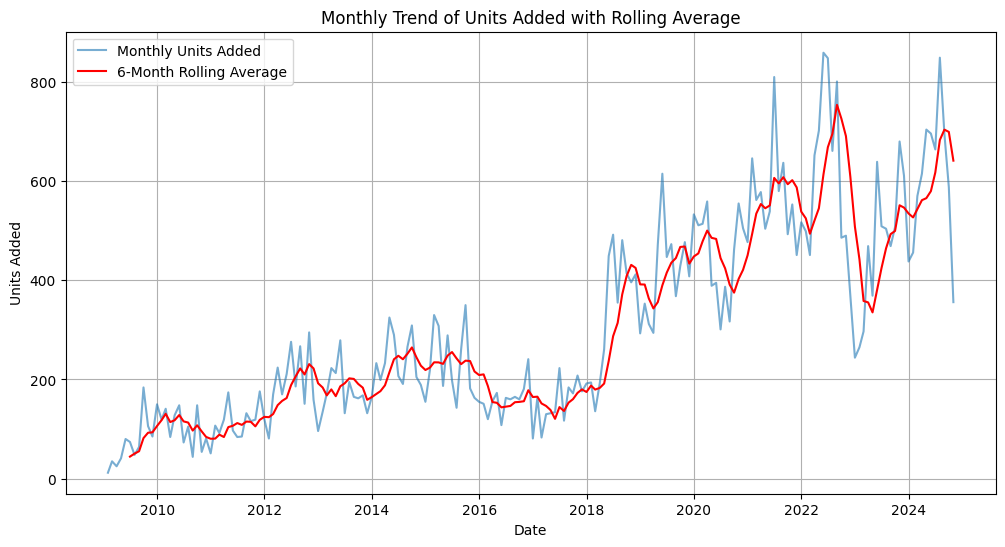

In [17]:
#(LINE CHART TIME SERIES) - Total Units Per YEAR smoothed

# Resample data monthly and calculate rolling mean
time_series_data = new_houses_df.set_index('PERMIT_DATE').resample('ME')['UNITS_ADDED'].sum()
rolling_mean = time_series_data.rolling(window=6).mean()

plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Monthly Units Added', alpha=0.6)
plt.plot(rolling_mean, label='6-Month Rolling Average', color='red')
plt.title('Monthly Trend of Units Added with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Units Added')
plt.legend()
plt.grid(True)
plt.show()


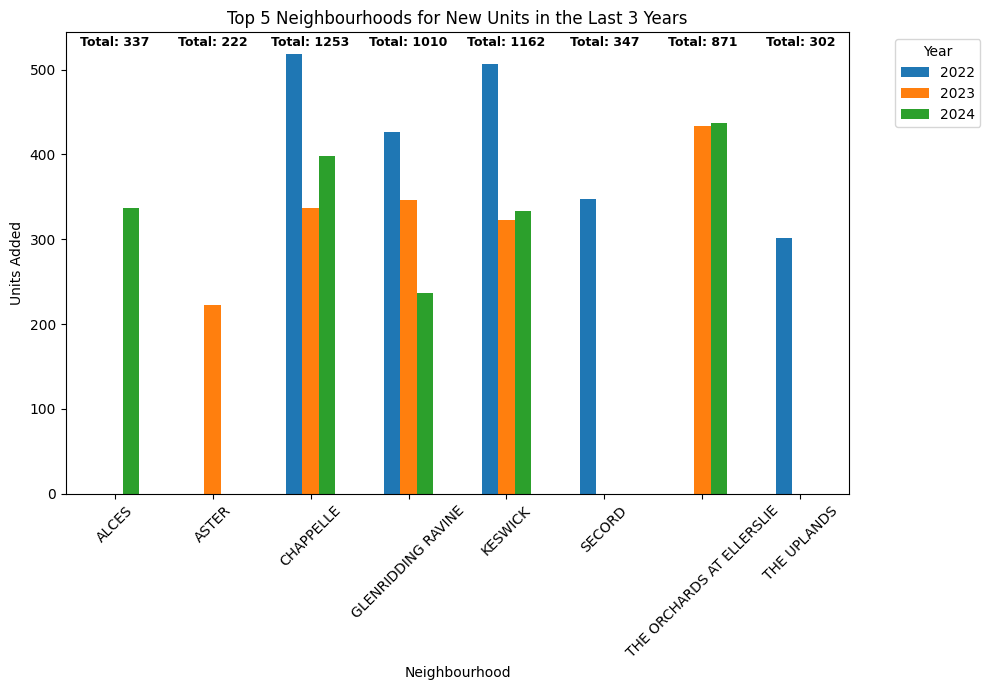

In [18]:
#(BAR CHART) - Total Units Added per Year - Last 3 years

# Select the last 3 years in the dataset
last_three_years = sorted(new_houses_df['YEAR'].unique())[-3:]

# Filter the DataFrame to only include the last 3 years
recent_years_df = new_houses_df[new_houses_df['YEAR'].isin(last_three_years)]

#Group by YEAR and NEIGHBOURHOOD, and sum the UNITS_ADDED
neighbourhood_units_per_year = recent_years_df.groupby(['YEAR', 'NEIGHBOURHOOD'])['UNITS_ADDED'].sum()

#For each year, get the top 5 neighborhoods
top_neighbourhoods_per_year = (
    neighbourhood_units_per_year.groupby('YEAR')
    .nlargest(5)
    .reset_index(level=1, drop=True)
    .reset_index()
)

#Pivot the data for plotting
pivot_data = top_neighbourhoods_per_year.pivot(index='NEIGHBOURHOOD', columns='YEAR', values='UNITS_ADDED')

#Calculate the total sum of UNITS_ADDED across the 3 years for each neighborhood
total_sum_per_neighbourhood = pivot_data.sum(axis=1)


ax = pivot_data.plot(kind='bar', figsize=(10, 7))
plt.title('Top 5 Neighbourhoods for New Units in the Last 3 Years')
plt.xlabel('Neighbourhood')
plt.ylabel('Units Added')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')


for i, neighbourhood in enumerate(pivot_data.index):
    total_units = total_sum_per_neighbourhood[neighbourhood]
    ax.text(i, ax.get_ylim()[1] * 0.97, f'Total: {int(total_units)}', ha='center', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

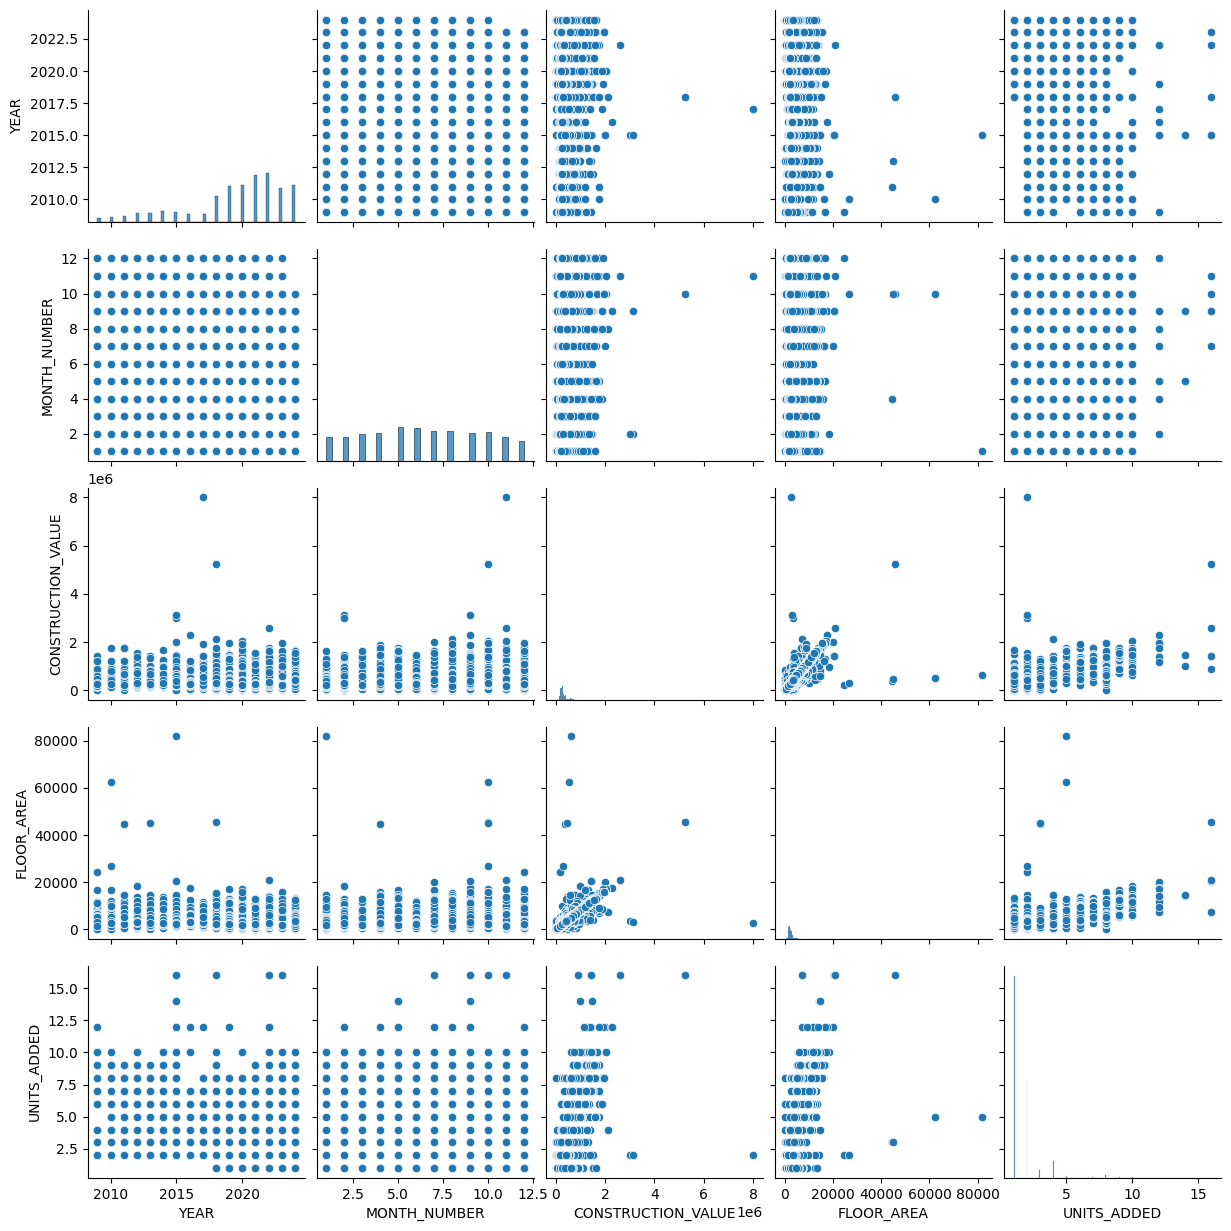

In [19]:

# Select the numerical relevant columns from the DataFrame
numerical_columns = new_houses_df[['YEAR', 'MONTH_NUMBER', 'CONSTRUCTION_VALUE', 'FLOOR_AREA', 'UNITS_ADDED']]

sns.pairplot(numerical_columns)

plt.show()

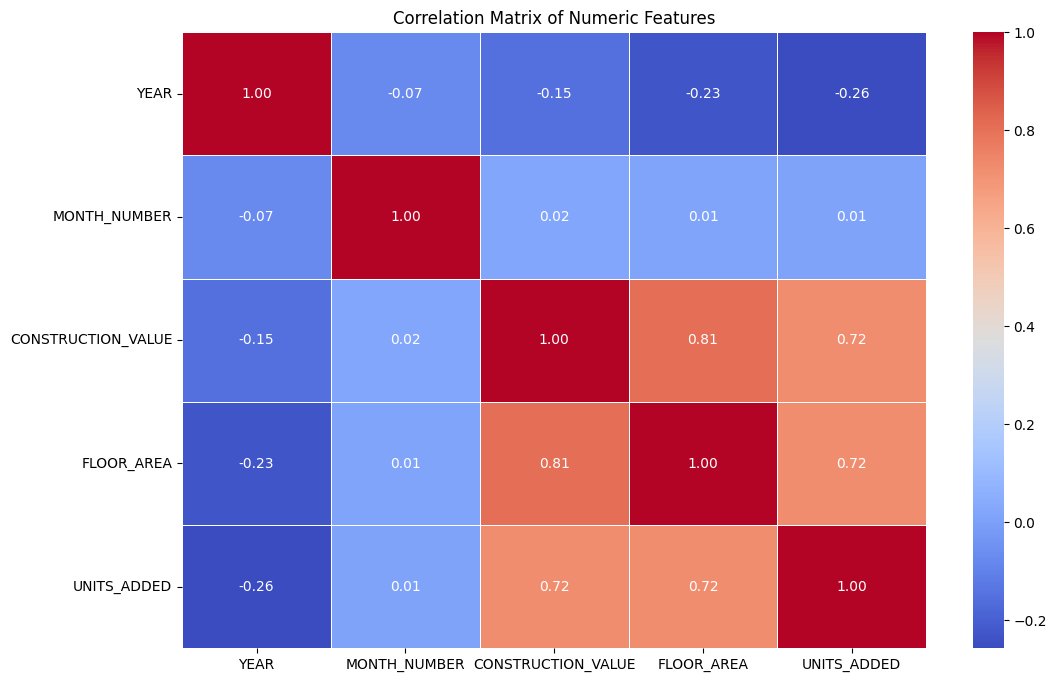

In [20]:
#Extract numeric columns
numeric_df = new_houses_df[['YEAR', 'MONTH_NUMBER', 'CONSTRUCTION_VALUE', 'FLOOR_AREA', 'UNITS_ADDED']]

#Compute correlation matrix
correlation_matrix = numeric_df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [21]:
# Apply log transformation to 'UNITS_ADDED' and 'CONSTRUCTION_VALUE' using .loc
new_houses_df.loc[:, 'log_UNITS_ADDED'] = np.log1p(new_houses_df['UNITS_ADDED'])  # log1p handles log(x + 1)
new_houses_df.loc[:, 'log_CONSTRUCTION_VALUE'] = np.log1p(new_houses_df['CONSTRUCTION_VALUE'])

#Histogram for 'log_UNITS_ADDED'
fig, ax = plt.subplots(figsize=(10, 6))

# Create a histogram for 'log_UNITS_ADDED'
sns.histplot(new_houses_df['log_UNITS_ADDED'], kde=False, color='blue', ax=ax)
plt.title('Histogram for log_UNITS_ADDED')
plt.show()

#Histogram for 'log_CONSTRUCTION_VALUE'
fig, ax = plt.subplots(figsize=(10, 6))

# Create a histogram for 'log_CONSTRUCTION_VALUE'
sns.histplot(new_houses_df['log_CONSTRUCTION_VALUE'], kde=False, color='blue', ax=ax)
plt.title('Histogram for log_CONSTRUCTION_VALUE')
plt.show()



NameError: name 'np' is not defined

C:\Users\diona\AppData\Local\Temp\ipykernel_36136\2929892780.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



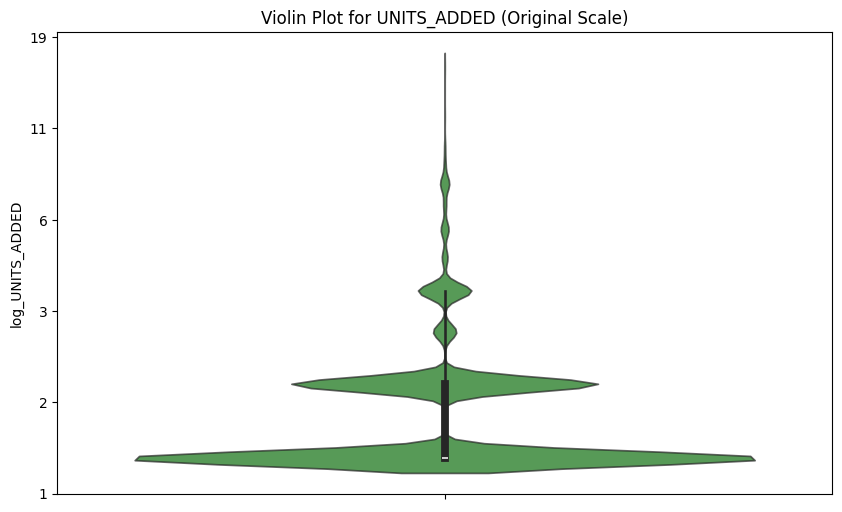

C:\Users\diona\AppData\Local\Temp\ipykernel_36136\2929892780.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



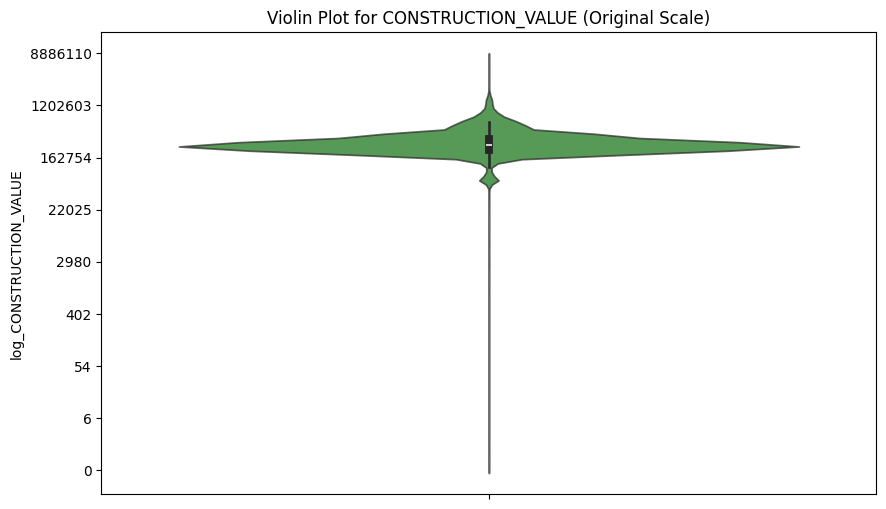

In [66]:
#Violin Plot for 'log_UNITS_ADDED' with original scale on Y-axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a violin plot for 'log_UNITS_ADDED'
sns.violinplot(y=new_houses_df['log_UNITS_ADDED'], ax=ax, color='green', alpha=0.7)

# Set Y-axis ticks to the original scale using inverse of log1p (exp(x) - 1)
tick_values = np.exp(ax.get_yticks()) - 1
ax.set_yticklabels([f'{val:.0f}' for val in tick_values])
plt.title('Violin Plot for UNITS_ADDED (Original Scale)')
plt.show()

# Violin Plot for 'log_CONSTRUCTION_VALUE' with original scale on Y-axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a violin plot for 'log_CONSTRUCTION_VALUE'
sns.violinplot(y=new_houses_df['log_CONSTRUCTION_VALUE'], ax=ax, color='green', alpha=0.7)

# Set Y-axis ticks to the original scale using inverse of log1p (exp(x) - 1)
tick_values = np.exp(ax.get_yticks()) - 1
ax.set_yticklabels([f'{val:.0f}' for val in tick_values])
plt.title('Violin Plot for CONSTRUCTION_VALUE (Original Scale)')
plt.show()

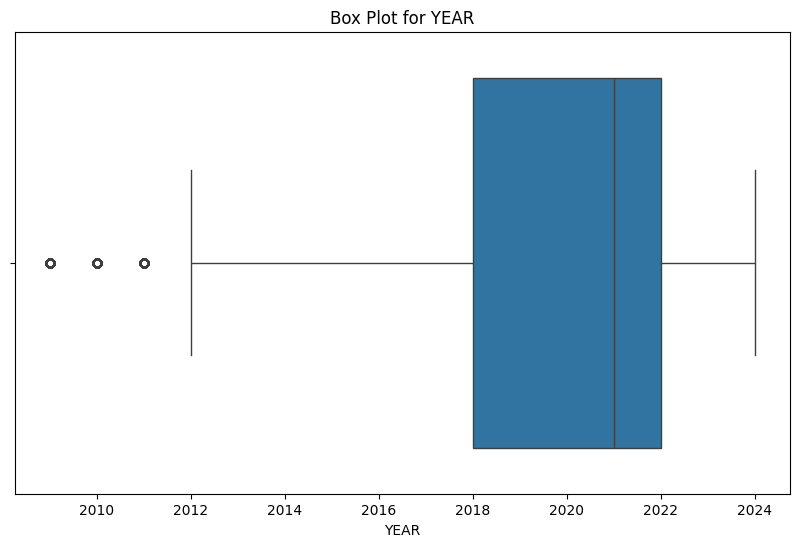

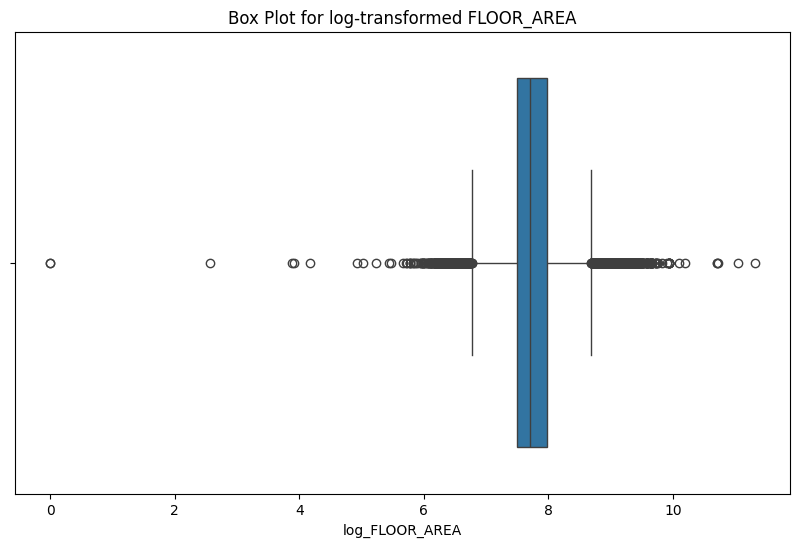

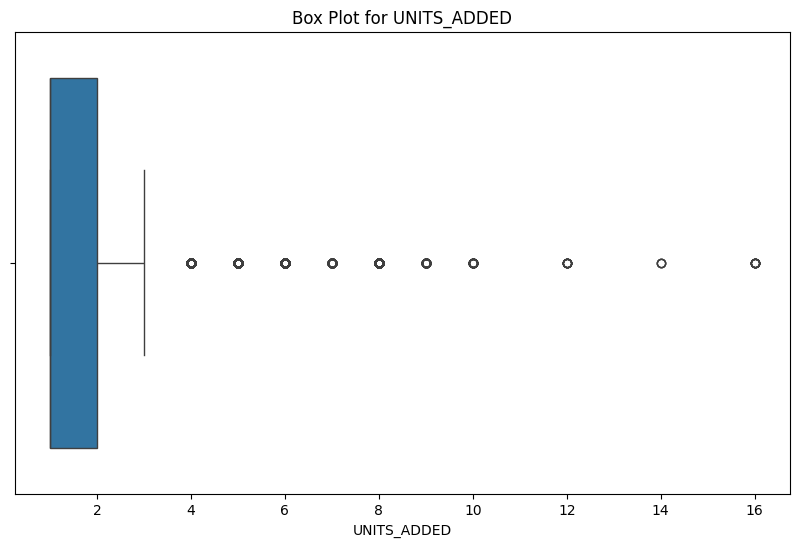

In [67]:
# Box plot for 'YEAR'
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_houses_df['YEAR'])
plt.title('Box Plot for YEAR')
plt.show()

# Apply log transformation to 'FLOOR_AREA' using .loc to avoid the warning
new_houses_df.loc[:, 'log_FLOOR_AREA'] = np.log1p(new_houses_df['FLOOR_AREA'])  # log1p handles log(x + 1)

#Box plot for log-transformed 'FLOOR_AREA'
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_houses_df['log_FLOOR_AREA'])
plt.title('Box Plot for log-transformed FLOOR_AREA')
plt.show()


# Box plot for 'UNITS_ADDED'
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_houses_df['UNITS_ADDED'])
plt.title('Box Plot for UNITS_ADDED')
plt.show()

In [69]:
#Filter the data for records from 2020 onwards
df_since_2020 = new_houses_df[new_houses_df['YEAR'] >= 2020]

#Aggregate data by neighborhood, summing up the units added
neighborhood_aggregated = df_since_2020.groupby(['NEIGHBOURHOOD', 'LATITUDE', 'LONGITUDE'])['UNITS_ADDED'].sum().reset_index()

#Create the bubble map
fig = px.scatter_mapbox(
    neighborhood_aggregated, 
    lat="LATITUDE", 
    lon="LONGITUDE", 
    hover_name="NEIGHBOURHOOD", 
    hover_data=["UNITS_ADDED"],
    color="UNITS_ADDED",
    size="UNITS_ADDED",
    color_continuous_scale=px.colors.sequential.Viridis,
    mapbox_style="carto-positron",
    title="Distribution of New Housing Units by Neighborhood (Since 2020)"
)


fig.update_layout(
    mapbox=dict(
        center=dict(lat=53.5461, lon=-113.4938),  
        zoom=9  
    ),
    width=800,
    height=800
)


fig.show()


In [70]:
import plotly.express as px
from sklearn.cluster import KMeans

#Select features for clustering
features = new_houses_df[['UNITS_ADDED', 'CONSTRUCTION_VALUE', 'FLOOR_AREA']].fillna(0)
kmeans = KMeans(n_clusters=4, random_state=42)
new_houses_df['Cluster'] = kmeans.fit_predict(features)

#Create a map to show clusters, with bubble size representing construction value
fig = px.scatter_mapbox(
    new_houses_df, 
    lat='LATITUDE', 
    lon='LONGITUDE', 
    color='Cluster', 
    size='CONSTRUCTION_VALUE',  # Bubble size represents construction value
    hover_name='NEIGHBOURHOOD', 
    hover_data=['UNITS_ADDED', 'CONSTRUCTION_VALUE'],
    mapbox_style="carto-positron", 
    center=dict(lat=53.5461, lon=-113.4938), 
    zoom=9,
    title="Clustering of Neighbourhoods by Construction Metrics"
)


fig.update_layout(
    width=800,  # Set the width of the figure
    height=800  # Set the height of the figure
)

fig.show()


C:\Users\diona\AppData\Local\Temp\ipykernel_36136\5825645.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
# Get the centroid values from the KMeans model
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['UNITS_ADDED', 'CONSTRUCTION_VALUE', 'FLOOR_AREA'])
centroids['Cluster'] = centroids.index

# Calculate mean values for key metrics for each cluster
cluster_summary = new_houses_df.groupby('Cluster')[['UNITS_ADDED', 'CONSTRUCTION_VALUE', 'FLOOR_AREA']].mean().reset_index()

#Merge the centroid data with the summary statistics
cluster_summary = cluster_summary.merge(centroids, on='Cluster', suffixes=('_mean', '_centroid'))

print(cluster_summary)


   Cluster  UNITS_ADDED_mean  CONSTRUCTION_VALUE_mean  FLOOR_AREA_mean  \
0        0          1.908281             3.667412e+05      3063.926400   
1        1          7.643678             1.482750e+06     11353.306513   
2        2          4.234004             6.810307e+05      5557.845064   
3        3          1.224993             2.262673e+05      1957.495850   

   UNITS_ADDED_centroid  CONSTRUCTION_VALUE_centroid  FLOOR_AREA_centroid  
0              1.907145                 3.664386e+05          3061.856590  
1              7.661597                 1.479687e+06         11315.874525  
2              4.228728                 6.806657e+05          5557.046203  
3              1.224221                 2.261384e+05          1956.258798  
